In [1]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

2023-12-01 06:20:05.378546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 06:20:05.828760: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 06:20:05.832609: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 06:20:09.258368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [113]:
def map(value, min, max):
        return (value/np.max(value)) * (max - min)

In [ ]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0

# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

Nsamples = 500
Nsymbols = 6000 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras
points_noise = 30

amp_noise=np.linspace(0.2,5,points_noise)

message_org=[]
message_corrupt=[]
Nsymbols_noise=Nsymbols//points_noise

print(f'Simbolos por ruido: {Nsymbols_noise}')

for a in amp_noise:
    message_corrupt_, message_org_, _ = generate_symbols(a0, a1, Nsamples=Nsamples, Nsymbols=Nsymbols_noise, var_noise=a)
    message_corrupt.extend(message_corrupt_)
    message_org.extend(message_org_)
    
time = np.linspace(0, N, N)
message_org = np.array(np.split(np.array(message_org), Nsymbols))
message_corrupt = map_range(np.array(message_corrupt), a0, a1)

print(message_corrupt.shape)
print(message_org.shape)

sym_print=6

plt.figure(figsize=(10,5),tight_layout=True) 
plt.title("Datos de entrenamiento")
plt.plot(time[0:200*Nsamples*sym_print],message_org[:200*sym_print].flatten(), color='blue', alpha=(1), label='Señal Original')
plt.plot(time[0:200*Nsamples*sym_print],message_corrupt[:200*sym_print].flatten(), color='green', alpha=0.5, label=f'Señal Con Ruido' )
plt.axhline((a0+a1)/2, color=(0,0,0,0.2), linestyle='--')  
plt.legend()
plt.show()

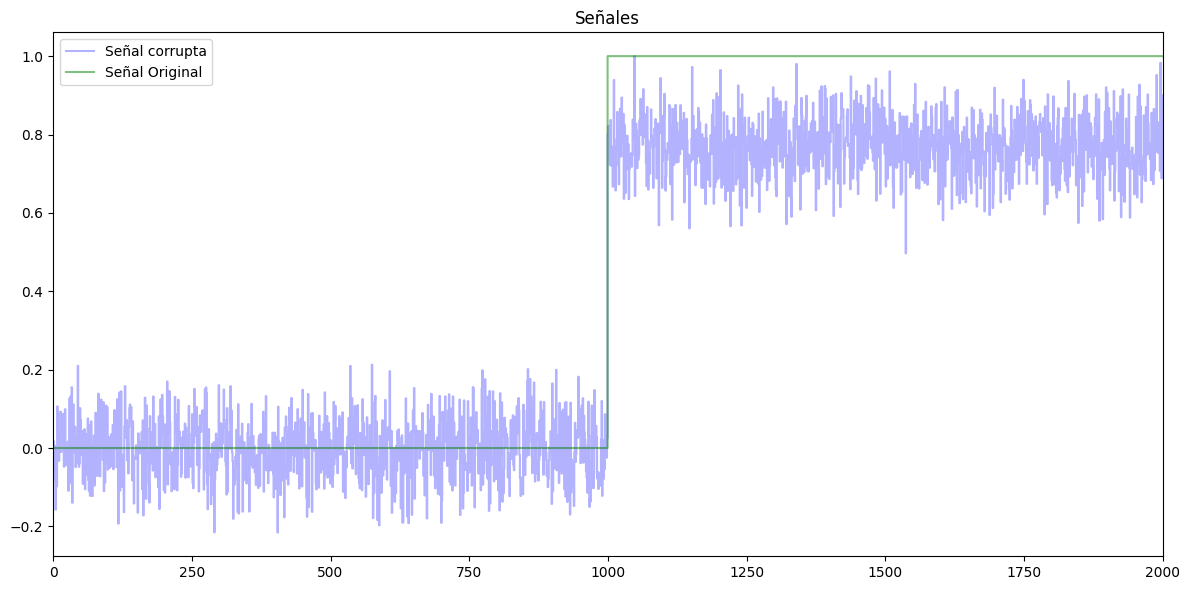

In [114]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 1000 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 0.1

Nsymbols = 2 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

# Genera una secuencia de símbolos basados en las probabilidades dadas
#data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data = [a0,a1]

# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message_org = data  # Almacena la secuencia completa en la variable 'message'

o2 = 1

noise = np.random.normal(0, o2, N)

message_corrupt  = message_org + noise*amp_noise


message_corrupt = message_corrupt.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada
message_org = message_org.reshape(-1, 1)   

message_corrupt = map(message_corrupt, 0, 1)
message_org = map(message_org, 0, 1)


plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_corrupt, '-b', label='Señal corrupta', alpha=0.3)
plt.step(time,message_org, '-g',label='Señal Original', alpha = 0.5)
#plt.step(time,y_pred_test, '-r',label='Señal Recuperada', alpha=0.3)
plt.xlim(0,int(N/1))
plt.title(f'Señales')
plt.legend()
plt.show()

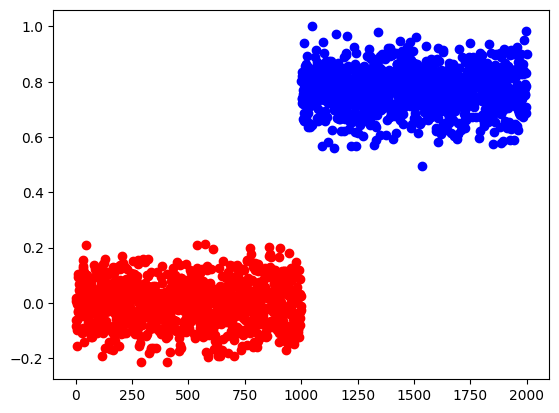

In [115]:
p1 = len(message_org)//2
p2 = len(time)//2

simbol_a0 = message_corrupt[:p1]
time_a1 = time[:p2]
simbol_a1 = message_corrupt[p1:]
time_a2 = time[p2:]

plt.scatter( time_a1, simbol_a0, c='r')
plt.scatter( time_a2, simbol_a1, c='b')
plt.show()

In [116]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

def forward_propagation(X,b1,b2, W1, W2):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y_pred = sigmoid(a2)
    return a1, z1, a2, y_pred

def compute_cost(y,y_pred):
    J = 0.5 * sum((y - y_pred) ** 2)
    return J

def backward_propagation(X,y_pred,y,W2, z2, a1, z1):
    delta2 = np.multiply(-(y - y_pred), sigmoid_derivative(z2))
    dJ_dW2 = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1)
    dJ_dW1 = np.dot(X.T, delta1)
    return dJ_dW1, dJ_dW2

```python
#Datos aleatorios random de grados C° para el entrenamiento
celsius = np.random.randint(0,100, size=(100))
fahrenheit = [round(x*1.8 + 32.2) for x in celsius] #Conversión

print(celsius)
print(fahrenheit)

In [117]:
X = np.array([x for x in message_corrupt])
y = np.array([y for y in message_org])

input_no = 1
output_no = 1
hidden_no = 10

W1 = np.random.randn(input_no, hidden_no)
b1 = np.ones([1, hidden_no])

W2 = np.random.randn(hidden_no, output_no)
b2 = np.ones([1, output_no])

alpha = 0.05
num_iterations = 400

cost =[]

Text(0, 0.5, 'Loss')

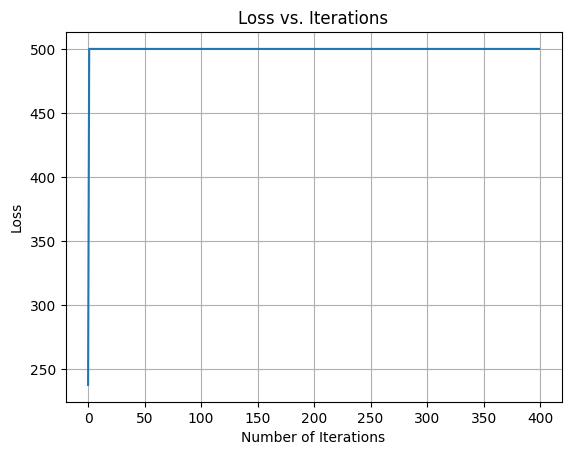

In [118]:
for i in range(num_iterations):
    z1, a1, z2, y_pred = forward_propagation(X, b1,b2,W1, W2)
    dJ_dW1, dJ_dW2 = backward_propagation(X,y_pred,y,W2, z2, a1, z1)

    W1 = W1 - (alpha * dJ_dW1)
    W2 = W2 - (alpha * dJ_dW2)

    c = compute_cost(y,y_pred)
    cost.append(c)

plt.grid() 
plt.plot(range(num_iterations), cost)
plt.title('Loss vs. Iterations') 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss')

In [119]:
print(np.sum(W1))
print(W2)

-4.467047431531416
[[ 2.72857121]
 [ 4.19258366]
 [ 5.72875536]
 [ 4.27844024]
 [-1.78013477]
 [ 4.12055847]
 [ 3.84054852]
 [ 1.56185636]
 [ 0.73827353]
 [ 3.89397865]]
